#Estado: Primeiras analises em relação à quantidade e variável target

#Importações

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [121]:
df = pd.read_csv('https://raw.githubusercontent.com/leoferro/9_competicao_ml_flay/main/treino.csv')

In [122]:
df.head()

,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis
0,16,sábado,não,verão,39.4,0.0,61.1,2.19,92.0%,3.49,1318
1,21,sexta,não,primavera,22.2,0.0,63.3,0.00,32.0%,2.89,686
2,16,segunda,não,verão,40.5,0.0,52.8,2.51,93.0%,3.97,831
3,7,segunda,sim,outono,25.6,0.0,70.9,0.00,97.0%,1.09,15
4,9,segunda,não,verão,39.9,0.0,58.1,1.69,62.0%,1.09,865


#Analise Individual

##Ajustes de variáveis iniciais

In [123]:
#Transformação da variável visibilidade em numérica
df['visibilidade'] = df.visibilidade.apply(lambda x : x[:-1]).astype(float)

##Geral

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hora          4500 non-null   int64  
 1   dia           4500 non-null   object 
 2   feriado       4500 non-null   object 
 3   estação       4500 non-null   object 
 4   temperatura   4500 non-null   float64
 5   chuva         4500 non-null   float64
 6   umidade       4500 non-null   float64
 7   sol           4500 non-null   float64
 8   visibilidade  4500 non-null   float64
 9   vento         4500 non-null   float64
 10  aluguéis      4500 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 386.8+ KB


In [125]:
df.describe()

,hora,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.00000,4500.000000,4500.000000
mean,11.644889,27.108356,0.161864,62.087133,0.578104,69.69400,2.322933,727.169556
std,6.901146,7.976684,1.179291,15.176118,0.878158,29.60473,1.243427,646.886075
min,0.000000,6.500000,0.000000,18.100000,0.000000,2.00000,0.250000,5.000000
25%,6.000000,20.900000,0.000000,50.500000,0.000000,45.00000,1.330000,208.750000
50%,12.000000,27.800000,0.000000,61.100000,0.010000,83.00000,2.050000,534.500000
75%,18.000000,33.500000,0.000000,73.900000,0.940000,97.00000,3.010000,1096.000000
max,23.000000,44.600000,27.650000,92.000000,3.520000,97.00000,9.130000,3566.000000


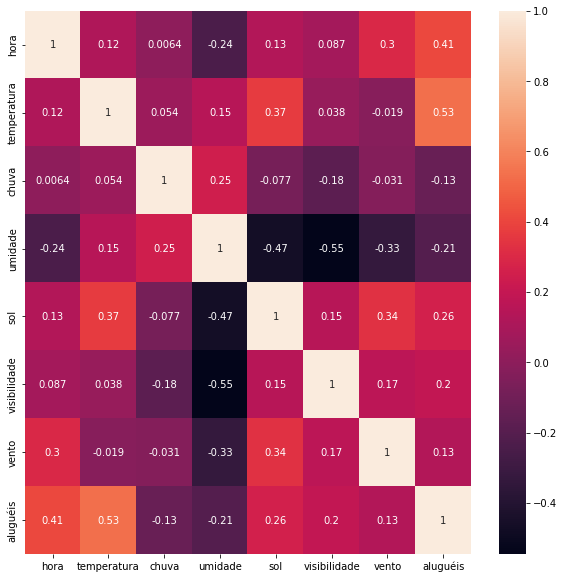

In [126]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

##Aluguéis

Possivelmente é melhor trabalhar com a variável aluguéis dentro do log

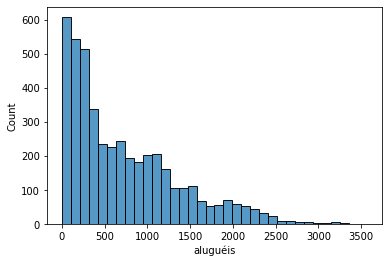

In [127]:
sns.histplot(df.aluguéis)

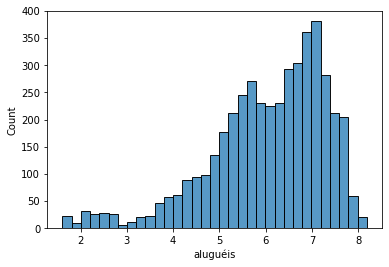

In [128]:
sns.histplot(np.log(df.aluguéis))

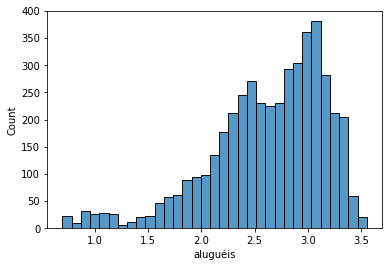

In [129]:
sns.histplot(np.log10(df.aluguéis))

###Modificação da variável aluguéis

In [163]:
#Teste - > modificação da variável aluguél antes das analizes:
df['aluguéis']=np.log(df.aluguéis)

##Hora

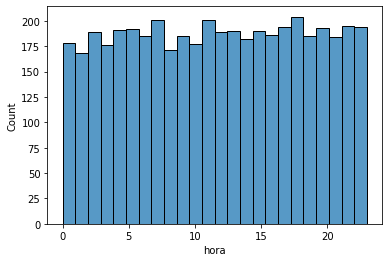

In [164]:
sns.histplot(df.hora, bins=24)

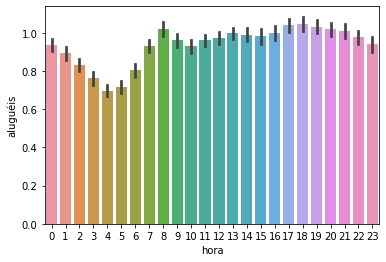

In [165]:
sns.barplot(data=df, x='hora', y='aluguéis')

##Dia

In [166]:
#Lista para organizar dias:
org_dia = ['segunda', 'terça','quarta', 'quinta', 'sexta', 'sábado', 'domingo']


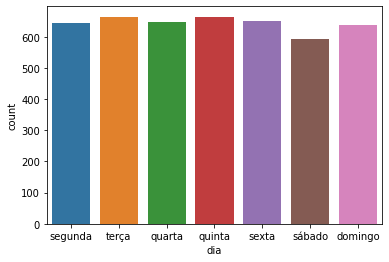

In [167]:
sns.countplot(
    data=df,
    x='dia', 
    order=org_dia
    )

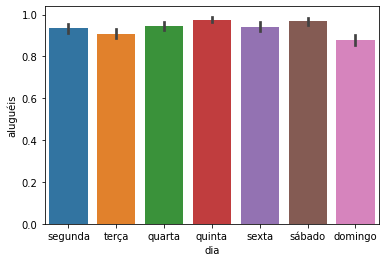

In [168]:
sns.barplot(
    data=df,
    x='dia',
    y='aluguéis',
    order=org_dia
)

##Feriado

<p>- Criar mais dias com feriado?</p>
<p>- Como cada dia da semana se comporta com o feriado?</p>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


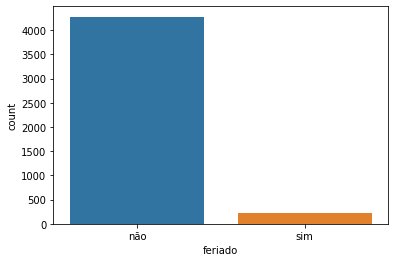

In [169]:
sns.countplot(df.feriado)

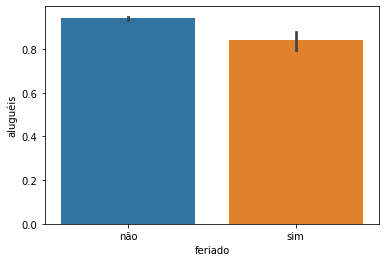

In [170]:
sns.barplot(
    data=df,
    x='feriado',
    y='aluguéis'
)

##Estação

In [171]:
org_estac = ['inverno', 'primavera', 'verão', 'outono']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


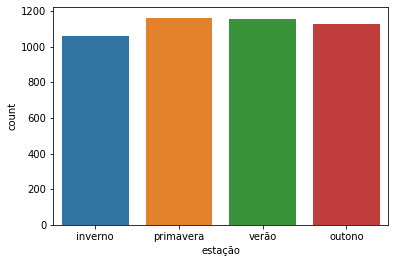

In [172]:
sns.countplot(
    df.estação,
    order = org_estac
    )

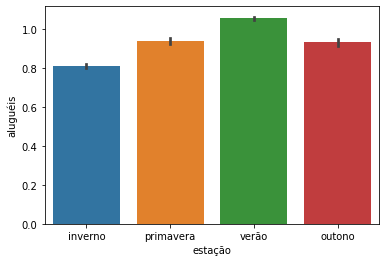

In [173]:
sns.barplot(
    data=df,
    x='estação',
    y='aluguéis',
    order=org_estac
)

##Temperatura

<p>Criar vizualizações melhores para temperatura</p>

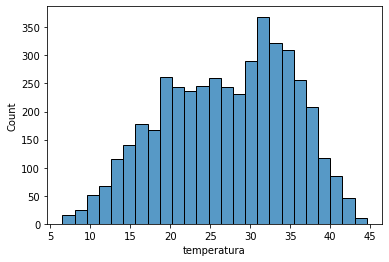

In [174]:
sns.histplot(df.temperatura)

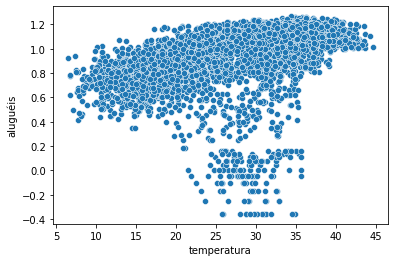

In [175]:
sns.scatterplot(
    data=df,
    x='temperatura',
    y='aluguéis'
)

##Chuva

<p>Possibilidade de gerar classes com chuva e não log</p>

###Sem log

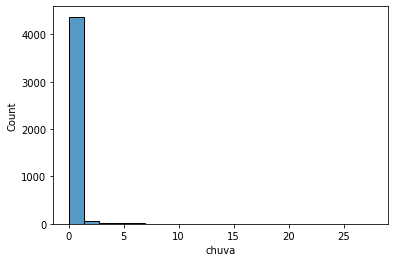

In [176]:
sns.histplot(df.chuva, bins=20)

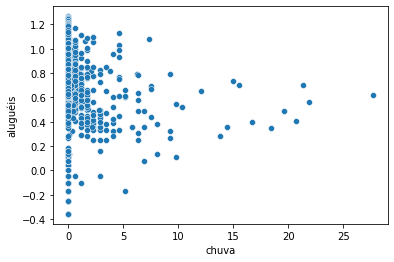

In [177]:
sns.scatterplot(
    data=df,
    x='chuva',
    y='aluguéis'
)

###Com log

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


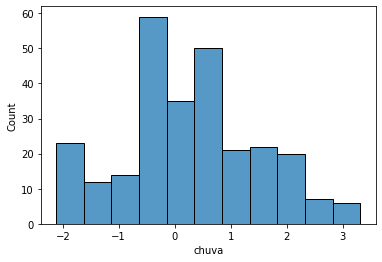

In [178]:
sns.histplot(np.log(df.chuva))

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


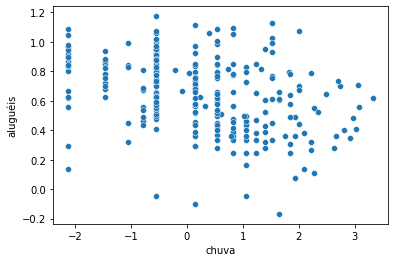

In [179]:
sns.scatterplot(
    x=np.log(df.chuva),
    y=df.aluguéis
)

##Umidade

<p>Pensar em um modo de agrupar ou melhorar essa variável</p>

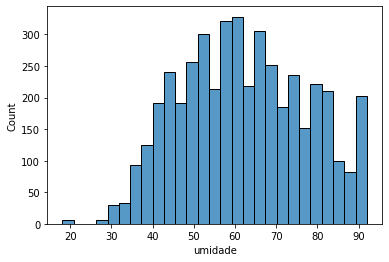

In [180]:
sns.histplot(
    df.umidade
)

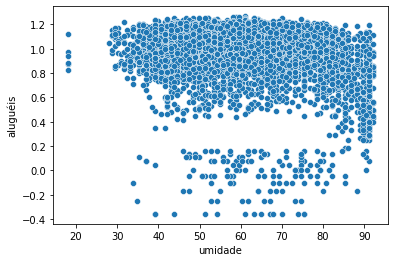

In [181]:
sns.scatterplot(
    data=df,
    x='umidade',
    y='aluguéis'
)

##Sol

###Sem log

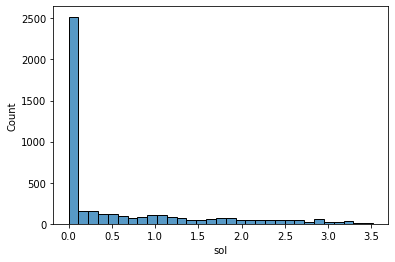

In [182]:
sns.histplot(df.sol)

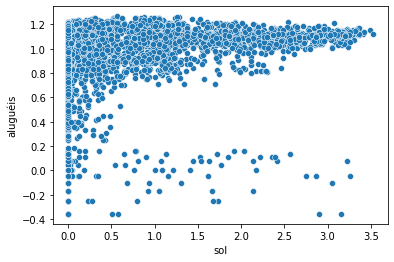

In [183]:
sns.scatterplot(
    data=df,
    x='sol',
    y='aluguéis'
)

###Com log

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


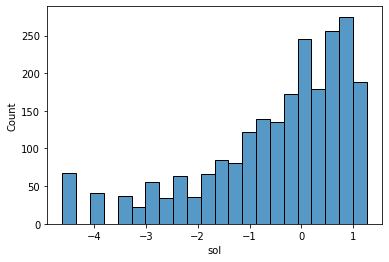

In [184]:
sns.histplot(np.log(df.sol))

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


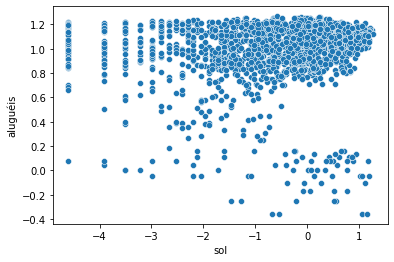

In [185]:
sns.scatterplot(
    x=np.log(df.sol),
    y=df.aluguéis
)

##Visibilidade

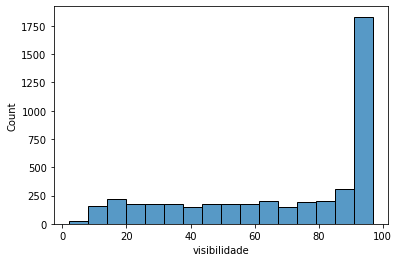

In [186]:
sns.histplot(df.visibilidade)

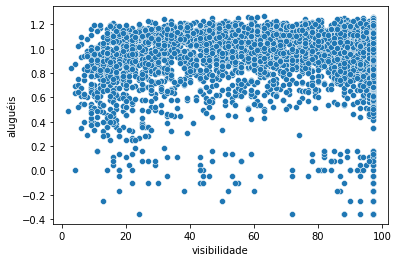

In [187]:
sns.scatterplot(
    x=df.visibilidade,
    y=df.aluguéis
)

##Vento

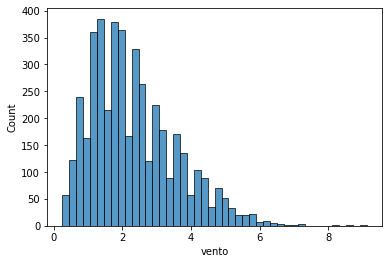

In [188]:
sns.histplot(df.vento)

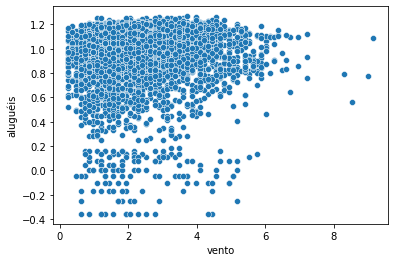

In [189]:
sns.scatterplot(
    data=df,
    x='vento',
    y='aluguéis'
)

# Analise multiplas

##Hora

###Dia

Domingos são dias bem diferentes

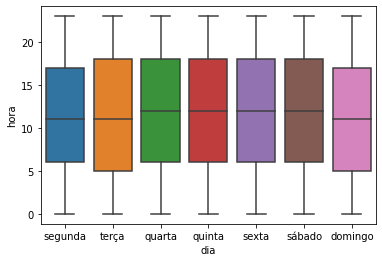

In [190]:
sns.boxplot(data=df, y='hora', x='dia', order=org_dia)

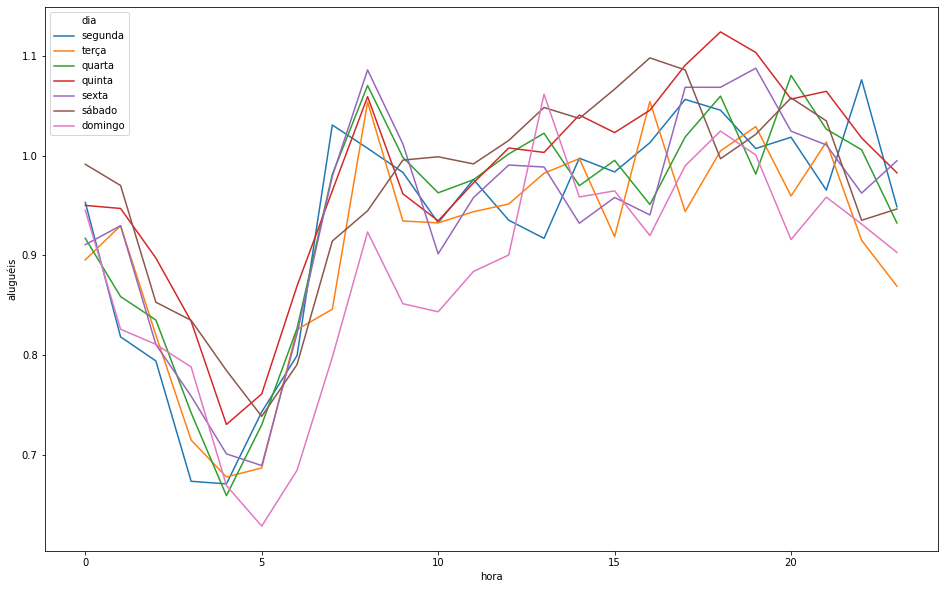

In [191]:
plt.figure(figsize=(16,10))
sns.lineplot(
    data=df,
    x='hora',
    y='aluguéis',
    hue='dia',
    hue_order=org_dia,
    alpha=1,
    err_style=None
)

###Feriado

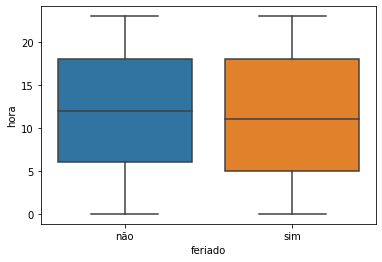

In [192]:
sns.boxplot(data=df, y='hora', x='feriado')

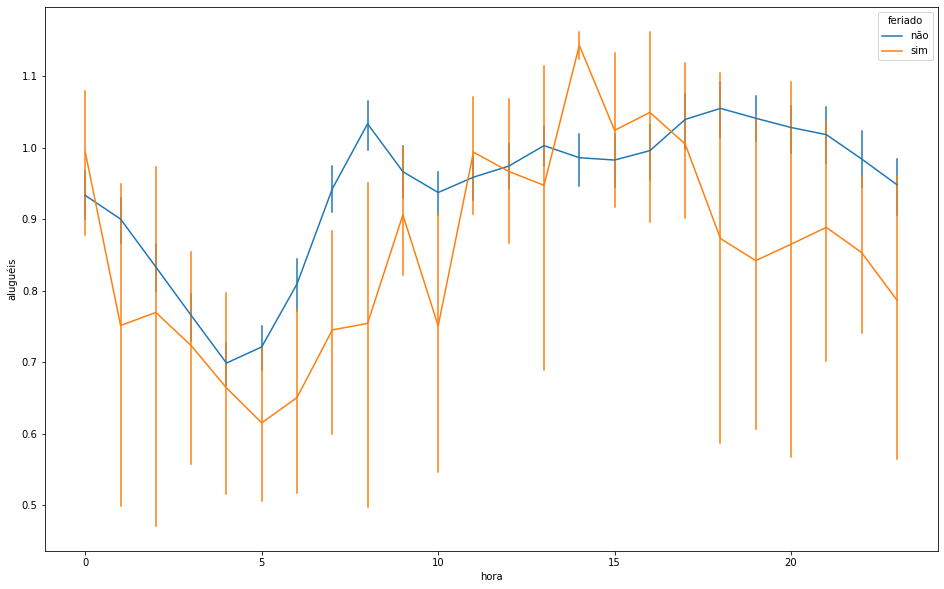

In [193]:
plt.figure(figsize=(16,10))
sns.lineplot(
    data=df,
    x='hora',
    y='aluguéis',
    hue='feriado',
    alpha=1,
    err_style='bars'
)

###Estação

######Tratar primavera e outono igualmente

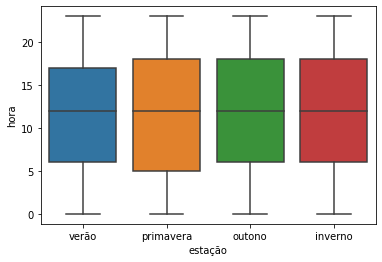

In [194]:
sns.boxplot(data=df, y='hora', x='estação')

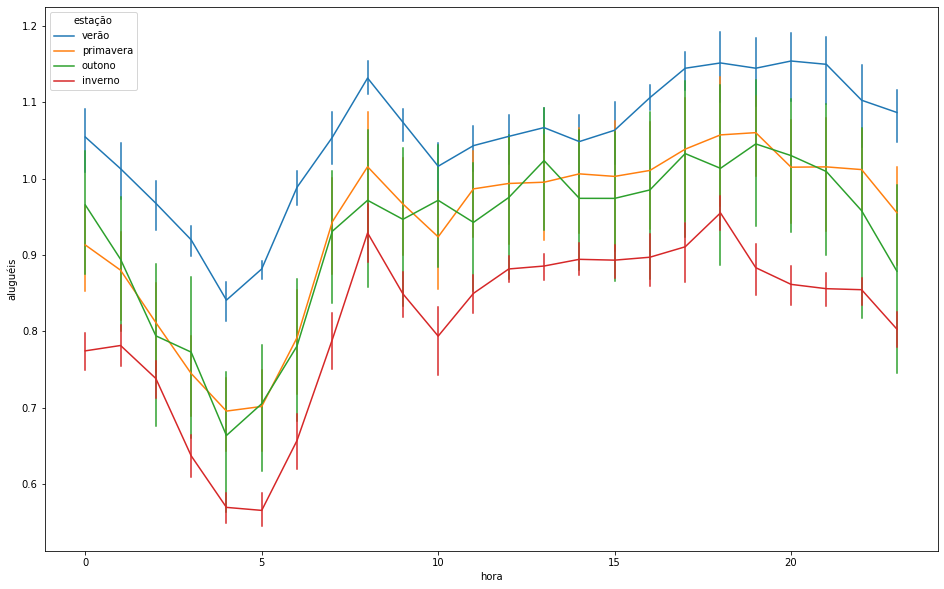

In [195]:
plt.figure(figsize=(16,10))
sns.lineplot(
    data=df,
    x='hora',
    y='aluguéis',
    hue='estação',
    alpha=1,
    err_style='bars'
)